In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset From Kegal website
url = 'https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download'

In [2]:
data = pd.read_csv(r'Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Normalize features
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

## Data Visualization

### 1. Categorical Graph: Gender Distribution

A bar chart is created to visualize the distribution of genders in the dataset.

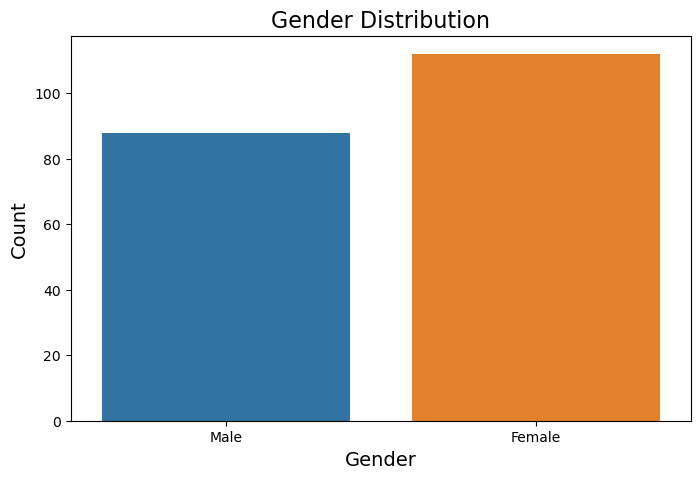

In [4]:
def plot_gender_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.savefig("Gender Distribution")
    plt.show()

plot_gender_distribution(data)

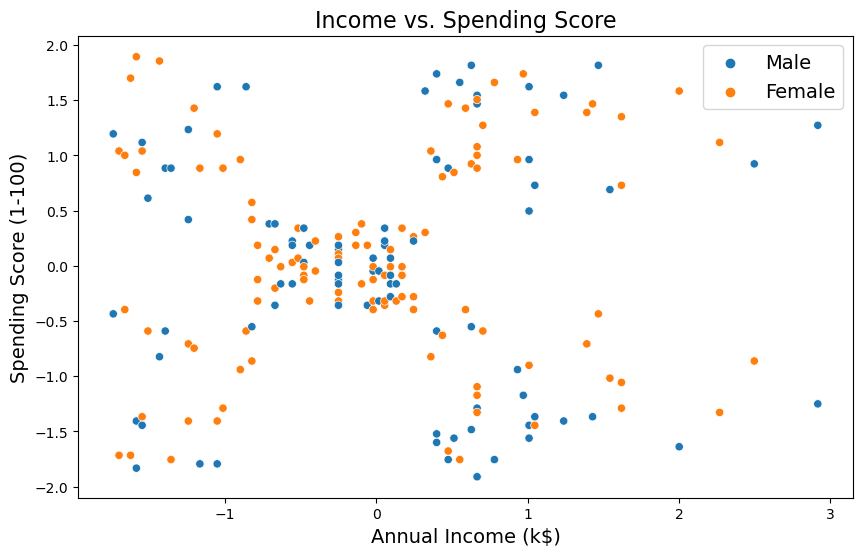

In [5]:
def plot_income_vs_spending(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
    plt.title('Income vs. Spending Score', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.legend(fontsize=14)
    plt.savefig("Income vs. Spending Score.png")
    plt.show()

plot_income_vs_spending(data)

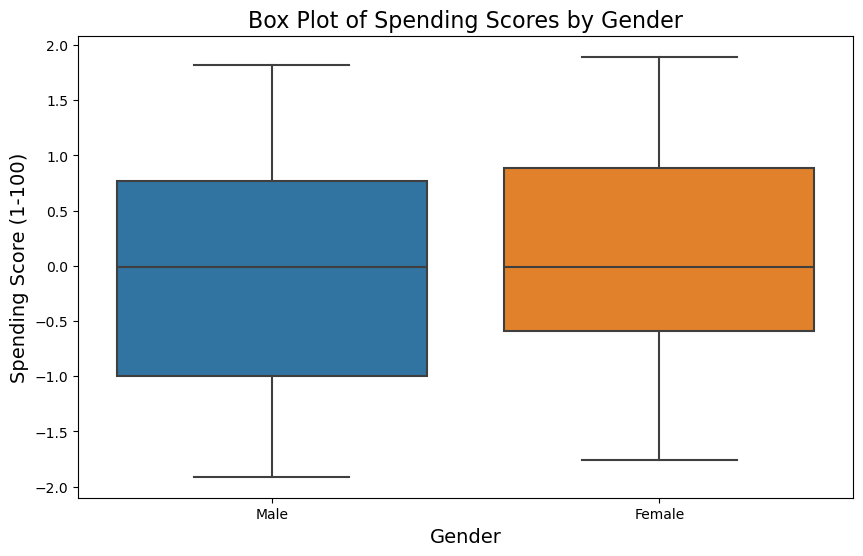

In [6]:
def plot_boxplot(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
    plt.title('Box Plot of Spending Scores by Gender',fontsize=16)
    plt.xlabel('Gender',fontsize=14)
    plt.ylabel('Spending Score (1-100)',fontsize=14)
    plt.savefig("Box Plot of Spending Scores by Gender.png")
    plt.show()

plot_boxplot(data)

### 4. Elbow Method Plot for K-means Clustering

The elbow method is used to determine the optimal number of clusters for K-means.

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\clust

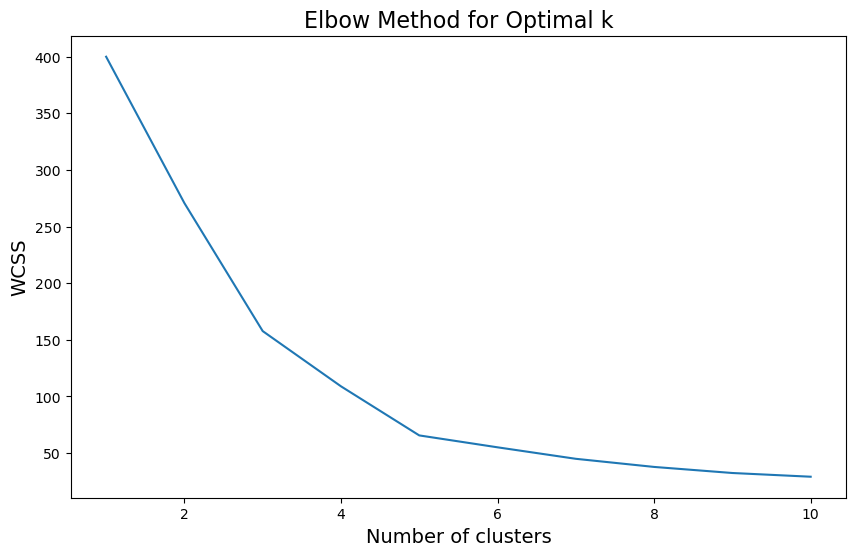

In [7]:
def plot_elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal k',fontsize=16)
    plt.xlabel('Number of clusters',fontsize=14)
    plt.ylabel('WCSS', fontsize=14)
    plt.savefig("Elbow Method for Optimal.png")
    plt.show()

plot_elbow_method(data)

## Clustering with K-means

After determining that $$ k=3 $$ is optimal via the elbow method, we proceed with K-means clustering.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


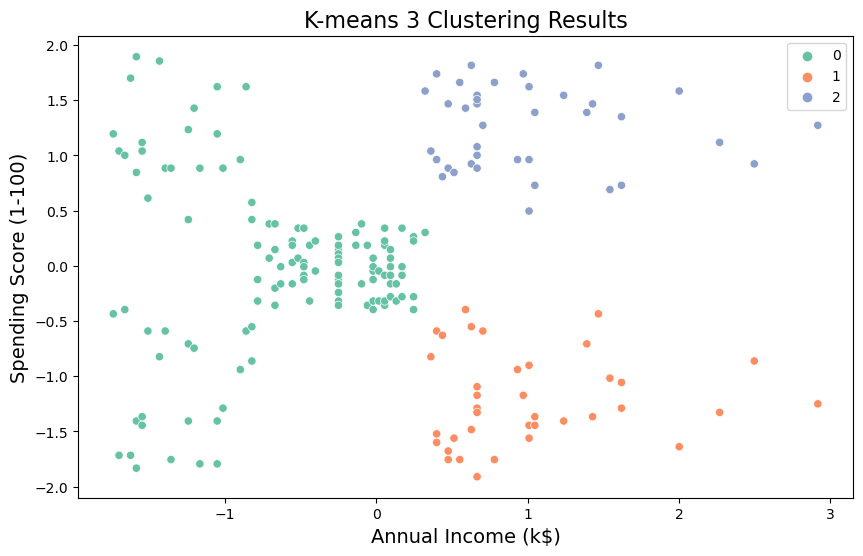

In [9]:
def plot_kmeans_clustering(data, filename='kmeans_clustering_results.png'):
    """
    Plots the K-means clustering results.

    Parameters:
    - data: DataFrame containing the clustering results with 'Annual Income (k$)', 
             'Spending Score (1-100)', and 'Cluster' columns.
    - filename: The name of the file to save the plot (default is 'kmeans_clustering_results.png').
    """
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                    hue='Cluster', palette='Set2', data=data)
    
    plt.title('K-means 3 Clustering Results', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.legend()
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()

plot_kmeans_clustering(data)

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


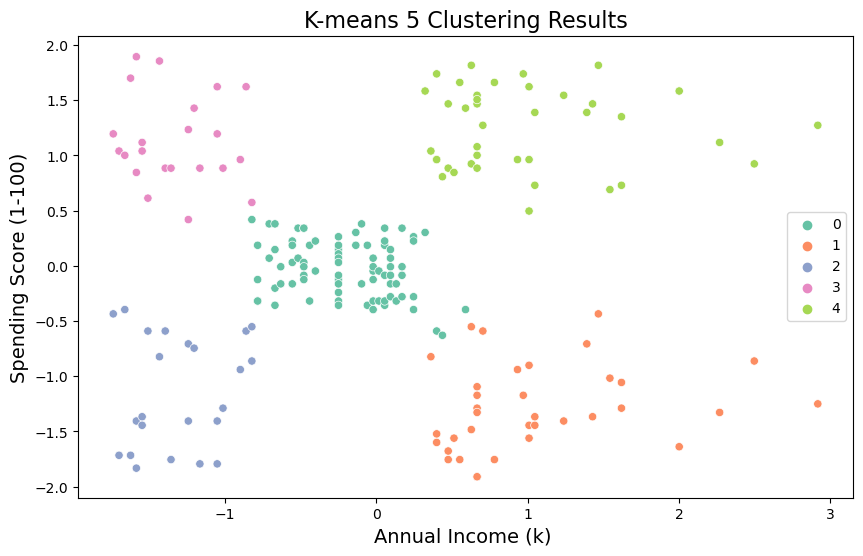

In [11]:
def plot_kmeans_clustering(data, filename='kmeans_clustering_results.png'):
    """
    Plots the K-means clustering results.

    Parameters:
    - data: DataFrame containing the clustering results with 'Annual Income (k$)', 
             'Spending Score (1-100)', and 'Cluster' columns.
    - filename: The name of the file to save the plot (default is 'kmeans_clustering_results.png').
    """
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                    hue='Cluster', palette='Set2', data=data)
    
    plt.title('K-means 5 Clustering Results',fontsize=16)
    plt.xlabel('Annual Income (k) ',fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.legend()
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()

plot_kmeans_clustering(data)

## Fitting a Linear Regression Model

To further analyze the relationship between annual income and spending score, we fit a linear regression model.


# Preparing data for regression

In [12]:
X = data[['Annual Income (k$)']]
y = data['Spending Score (1-100)']

# Fitting model

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
y_pred = model.predict(X)

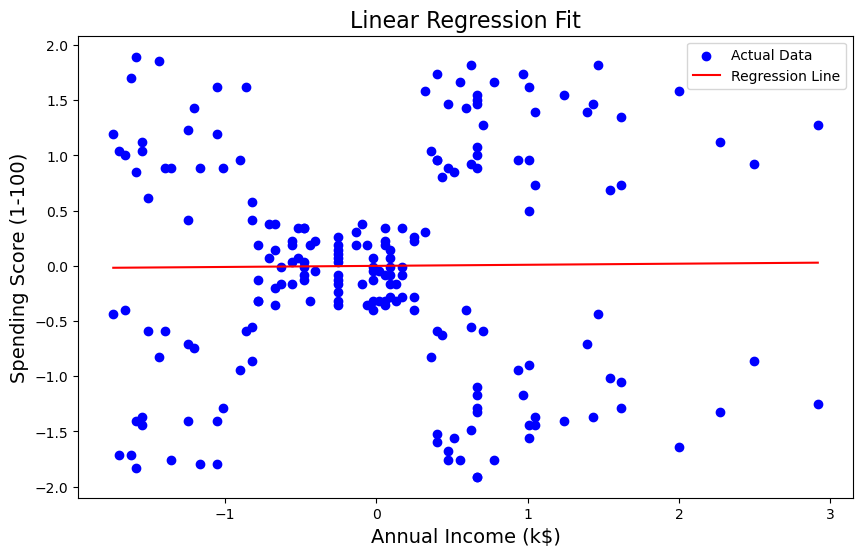

In [15]:
import matplotlib.pyplot as plt

def plot_and_save_linear_regression(X, y, y_pred, filename='linear_regression_fit.png'):
    """
    Plots the linear regression results and saves the figure.

    Parameters:
    - X: Array-like or DataFrame containing the independent variable (Annual Income).
    - y: Array-like or Series containing the dependent variable (Spending Score).
    - y_pred: Array-like containing the predicted values from the linear regression model.
    - filename: The name of the file to save the plot (default is 'linear_regression_fit.png').
    """
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')

    plt.title('Linear Regression Fit',fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.legend()
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()
plot_and_save_linear_regression(X, y, y_pred)